In [162]:
import sys
sys.path.append('../')

In [163]:
from scripts.utils import data_path
from scripts.cross_match_scripts import build_keras_model, plot_metrics, assess_classifier, save_keras_classifier, assess_classifier, photo_prior_create_train_test_validation_data
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline
photo_cat_scaled = pd.read_pickle('model/train_test_validation_data.pkl')

load_models = False


# Classification model: Keras - Sequential neural network

## GRZW1W2 data - baseline model

In [164]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2')

total x-ray sources:  29934
total non-x-ray sources:  62502
total sources:  92436
number of x-ray sources per flux bin:
x_ray_flux_bin
0    29934
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    62502
dtype: int64
x-ray flux bins:
[3.00076359e-15 3.92776796e-12]
********************
flux bin:  3.0007635913564e-15 3.927767961003e-12
train features: 
  ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_mag_w1', 'rel_dered_mag_w2', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z', 'rel_dered_z_w1', 'rel_dered_r_w2', 'rel_dered_w1_w2']
train size examples - filed:  35001
train size examples - x-ray: 16763
test size examples - filed:  8751
test size examples - x-ray 4191
validation size examples - filed:  18750
validation size examples - x-ray: 8980
downsampled field sources:  False
data is scaled


In [165]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grzw1w2, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(8,8,8,8),
                                    dropout_rate=0.1,
                                    initial_bias=initial_bias,)


if load_models:
    model_grzw1w2 = tf.keras.models.load_model('model/nnmag_grzw1w2.keras_nn')
    history_grzw1w2 =  pickle.load(open('model/nnmag_grzw1w2.keras_nn/history', "rb"))
    history_grzw1w2['epoch'] = np.arange(len(history_grzw1w2['loss']))

#tf.keras.utils.plot_model(model_grzw1w2)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 8)                 96        
                                                                 
 dense_118 (Dense)           (None, 8)                 72        
                                                                 
 dropout_63 (Dropout)        (None, 8)                 0         
                                                                 
 dense_119 (Dense)           (None, 8)                 72        
                                                                 
 dropout_64 (Dropout)        (None, 8)                 0         
                                                                 
 dense_120 (Dense)           (None, 8)                 72        
                                                                 
 dropout_65 (Dropout)        (None, 8)               

In [166]:
X_train.mean(axis=1)

array([0.28152816, 0.29034246, 0.35953429, ..., 0.33326603, 0.35927344,
       0.33919659])

In [167]:
if not load_models:

    history_grzw1w2 = model_grzw1w2.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)

    with open('model/nnmag_grzw1w2.keras_nn/history', 'wb') as file_pi:
        pickle.dump(history_grzw1w2.history, file_pi)



Restoring model weights from the end of the best epoch: 121.
Epoch 141: early stopping


Optimal threshold: 0.55
Optimal precision: 0.77
INFO:tensorflow:Assets written to: model/nnmag_grzw1w2.keras_nn/assets


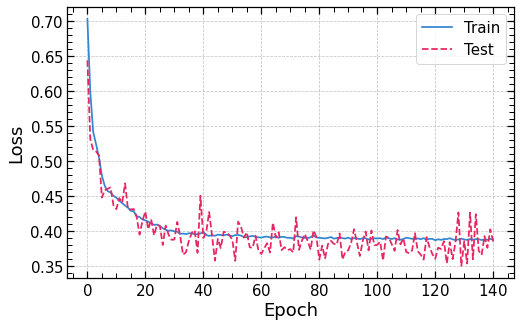

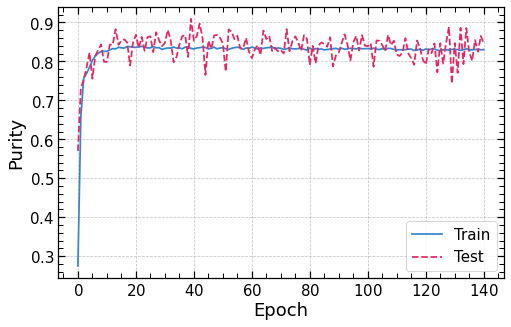

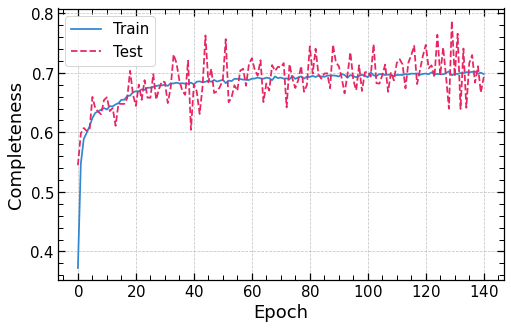

<Figure size 360x360 with 0 Axes>

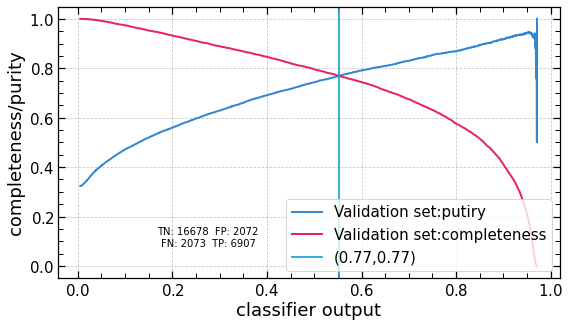

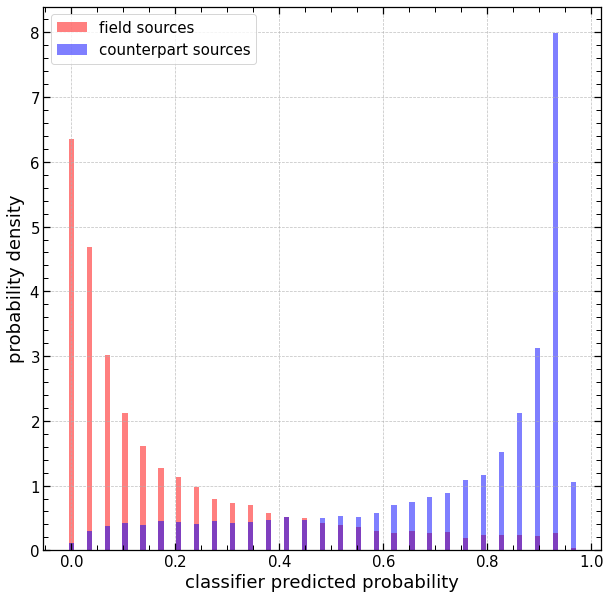

In [168]:
plot_metrics(history_grzw1w2)
_,_,_, hist_df = assess_classifier(model_grzw1w2, X_val, y_val);

if not load_models: save_keras_classifier(model_grzw1w2, hist_df, 'model/nnmag_grzw1w2')


## GRZW1 data - worser baseline model

In [169]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1')

total x-ray sources:  31388
total non-x-ray sources:  108325
total sources:  139713
number of x-ray sources per flux bin:
x_ray_flux_bin
0    31388
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    108325
dtype: int64
x-ray flux bins:
[3.00076359e-15 3.92776796e-12]
********************
flux bin:  3.0007635913564e-15 3.927767961003e-12
train features: 
  ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_mag_w1', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z', 'rel_dered_z_w1']
train size examples - filed:  60662
train size examples - x-ray: 17578
test size examples - filed:  15166
test size examples - x-ray 4394
validation size examples - filed:  32497
validation size examples - x-ray: 9416
downsampled field sources:  False
data is scaled


In [170]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grzw1, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(8,8,8,8),
                                    dropout_rate=0.1,
                                    initial_bias=initial_bias,)


if load_models:
    model_grzw1 = tf.keras.models.load_model('model/nnmag_grzw1.keras_nn')
    history_grzw1 =  pickle.load(open('model/nnmag_grzw1.keras_nn/history', "rb"))
    history_grzw1['epoch'] = np.arange(len(history_grzw1['loss']))

#tf.keras.utils.plot_model(model_grzw1)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 8)                 72        
                                                                 
 dense_123 (Dense)           (None, 8)                 72        
                                                                 
 dropout_66 (Dropout)        (None, 8)                 0         
                                                                 
 dense_124 (Dense)           (None, 8)                 72        
                                                                 
 dropout_67 (Dropout)        (None, 8)                 0         
                                                                 
 dense_125 (Dense)           (None, 8)                 72        
                                                                 
 dropout_68 (Dropout)        (None, 8)               

In [171]:
if not load_models:

    history_grzw1 = model_grzw1.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)

    with open('model/nnmag_grzw1.keras_nn/history', 'wb') as file_pi:
        pickle.dump(history_grzw1.history, file_pi)



Optimal threshold: 0.72
Optimal precision: 0.71
INFO:tensorflow:Assets written to: model/nnmag_grzw1.keras_nn/assets


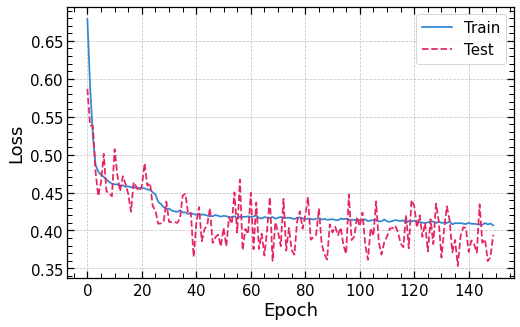

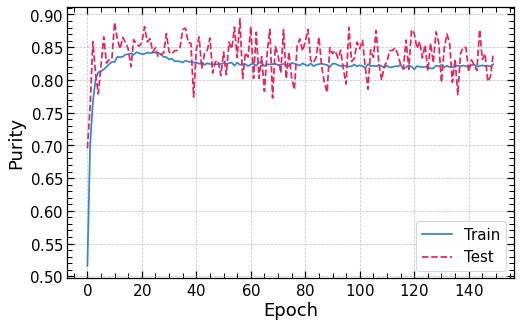

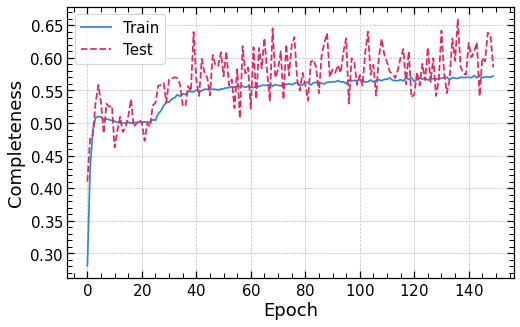

<Figure size 360x360 with 0 Axes>

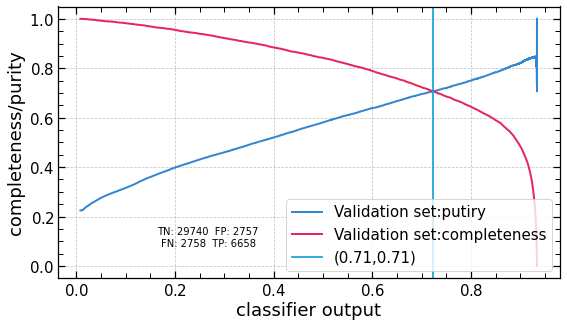

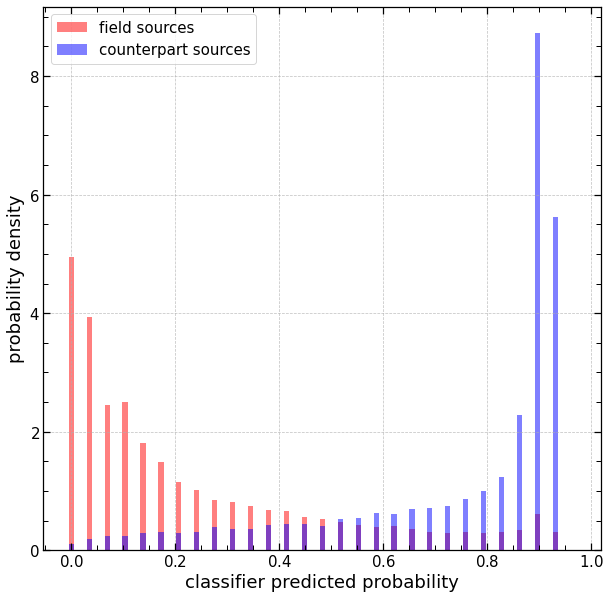

In [172]:
plot_metrics(history_grzw1)
_,_,_, hist_df = assess_classifier(model_grzw1, X_val, y_val);

if not load_models: save_keras_classifier(model_grzw1, hist_df, 'model/nnmag_grzw1')


## GRZ data - pessimistic model

In [173]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grz')

total x-ray sources:  32731
total non-x-ray sources:  214209
total sources:  246940
number of x-ray sources per flux bin:
x_ray_flux_bin
0    32731
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    214209
dtype: int64
x-ray flux bins:
[3.00076359e-15 3.92776796e-12]
********************
flux bin:  3.0007635913564e-15 3.927767961003e-12
train features: 
  ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z']
train size examples - filed:  119956
train size examples - x-ray: 18330
test size examples - filed:  29990
test size examples - x-ray 4582
validation size examples - filed:  64263
validation size examples - x-ray: 9819
downsampled field sources:  False
data is scaled


In [195]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grz, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(13,13),
                                    dropout_rate=0.0,
                                    initial_bias=initial_bias,)
#15,15 - 49%
#10,10 - 48%
#12, 12 - dropout 0.0 - 53%

if load_models:
    model_grz = tf.keras.models.load_model('model/nnmag_grz.keras_nn')
    history_grz =  pickle.load(open('model/nnmag_grz.keras_nn/history', "rb"))
    history_grz['epoch'] = np.arange(len(history_grz['loss']))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 13)                91        
                                                                 
 dense_144 (Dense)           (None, 13)                182       
                                                                 
 dropout_75 (Dropout)        (None, 13)                0         
                                                                 
 dense_145 (Dense)           (None, 1)                 14        
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [196]:
if not load_models:
    history_grz = model_grz.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)
    

    with open('model/nnmag_grz.keras_nn/history', 'wb') as file_pi:
        pickle.dump(history_grz.history, file_pi)



Optimal threshold: 0.71
Optimal precision: 0.54
INFO:tensorflow:Assets written to: model/nnmag_grz.keras_nn/assets


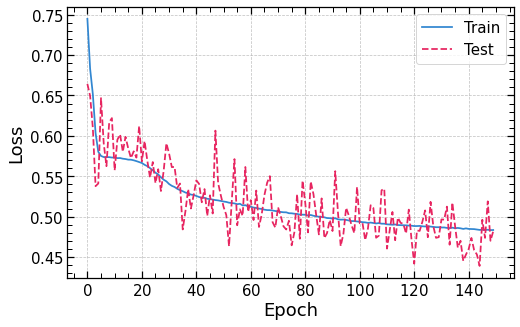

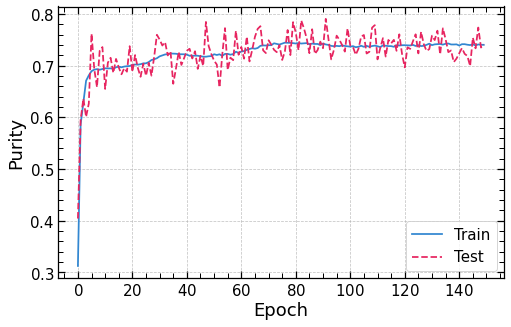

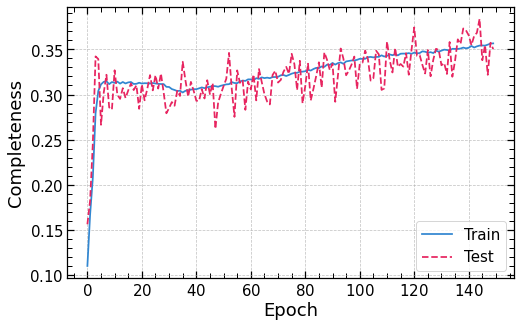

<Figure size 360x360 with 0 Axes>

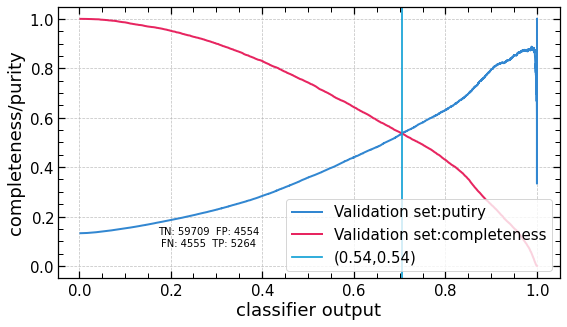

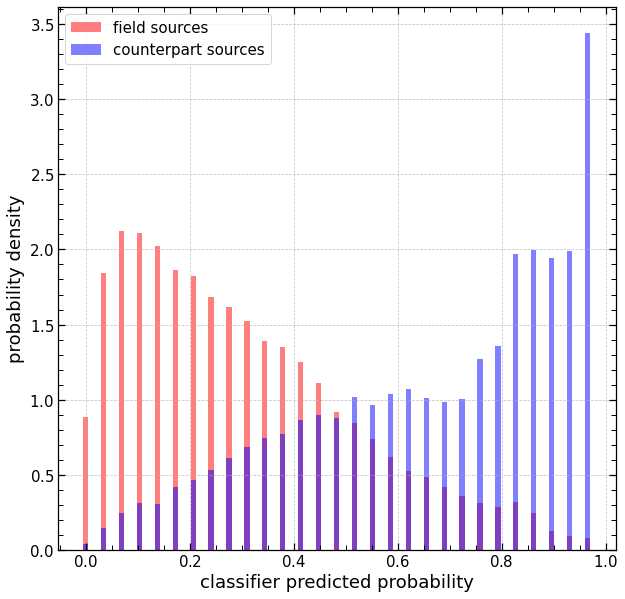

In [197]:
plot_metrics(history_grz)
_,_,_, hist_df = assess_classifier(model_grz, X_val, y_val);

if not load_models:  save_keras_classifier(model_grz, hist_df, 'model/nnmag_grz')


## GRZW1W2W3W4 data - best possible model

In [177]:
# learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2w3w4')

In [178]:
# X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
# initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

# model_grzw1w2w3w4, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
#                                     activation='tanh',
#                                     layers_num=(10,),
#                                     dropout_rate=0.1,
#                                     initial_bias=initial_bias,)

# if load_models:
#     model_grzw1w2w3w4 = tf.keras.models.load_model('model/nnmag_grzw1w2w3w4.keras_nn')
#     history_grzw1w2w3w4 =  pickle.load(open('model/nnmag_grzw1w2w3w4.keras_nn/history', "rb"))
#     history_grzw1w2w3w4['epoch'] = np.arange(len(history_grzw1w2w3w4['loss']))


In [179]:
# if not load_models: 
#     history_grzw1w2w3w4 = model_grzw1w2w3w4.fit(
#     X_train,
#     y_train,
#     batch_size=500,
#     epochs=150,
#     validation_data=(X_test, y_test), 
#     callbacks=[early_stopping],
#     class_weight=class_weight_train,
#     verbose=0)



#     with open('model/nnmag_grzw1w2w3w4.keras_nn/history', 'wb') as file_pi:
#         pickle.dump(history_grzw1w2w3w4.history, file_pi)


In [180]:
# plot_metrics(history_grzw1w2w3w4)
# _,_,_, hist_df = assess_classifier(model_grzw1w2w3w4, X_val, y_val);

# if not load_models: save_keras_classifier(model_grzw1w2w3w4, hist_df, 'model/nnmag_grzw1w2w3w4')
